# Simulation of TCLab for Offline Use

`TCLabModel` replaces `TCLab` for occasions where the TCLab hardware might not be available. To use, include the import

    from tclab import TCLabModel as TCLab 
    
The rest of your code will work without change. Be advised the underlying model used to approximate the behavior of the Temperature Control Laboratory is an approximation to the dynamics of the actual hardware.

In [1]:
from tclab import TCLabModel as TCLab

with TCLab() as a:
    print("Temperature 1: {0:0.2f} °C".format(a.T1))
    print("Temperature 2: {0:0.2f} °C".format(a.T2))

Simulated TCLab
Temperature 1: 20.64 °C
Temperature 2: 21.16 °C
TCLab Model disconnected successfully.


As an additional example.

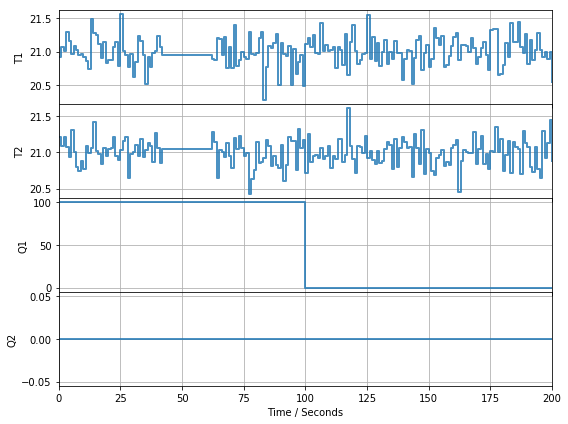

TCLab Model disconnected successfully.


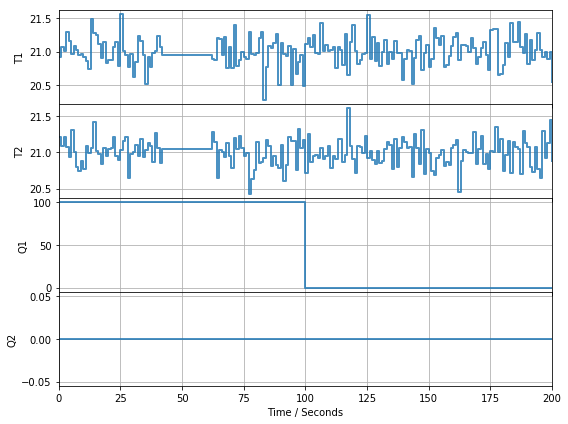

In [2]:
%matplotlib inline
from tclab import TCLabModel as TCLab
from tclab import clock, Historian, Plotter

with TCLab() as a:
    h = Historian(a.sources)
    p = Plotter(h, twindow=200)
    for t in clock(200):
        a.Q1(100 if t < 100 else 0)
        p.update(t)

### Speedup Factor with `setup()`

The setup function provides control over the use of the TCLab hardware or model. If using a model, an option to run at a multiple of real-time.

A speedup of 10 or greater causes the simulation to run as fast as possible.

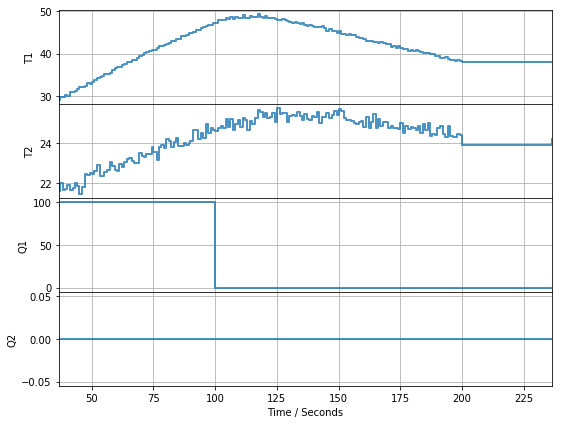

TCLab Model disconnected successfully.


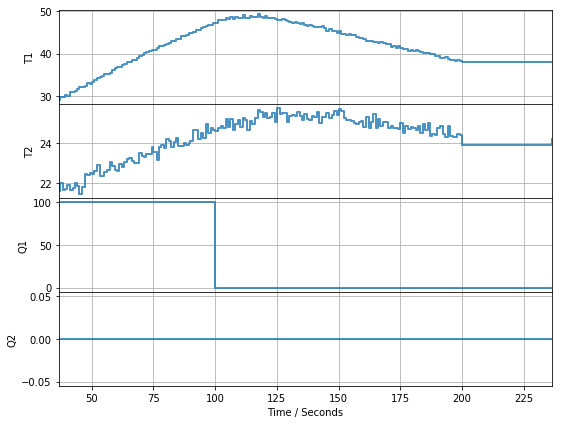

In [14]:
%matplotlib inline
from tclab import clock, Historian, Plotter, setup

TCLab = setup(connected=False, speedup=100)

with TCLab() as a:
    h = Historian(a.sources)
    p = Plotter(h, twindow=200)
    for t in clock(200):
        a.Q1(100 if t < 100 else 0)
        h.update(t)
    p.update()